# Module 02: A Box Model Carbon Assignment

## Due: 2021-09-21

## Name: Yao Gahounzo

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  
  
  
  By including the mass of carbon in the land to the photosynthesis flux, the system of equations becomes,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1M_2
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1M_2 - k_{21}M_2.
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M1i = 1100.0             # initial mass of carbon in atmosphere in gigatonne (Gt/C)
M2i = 300.0              # initial mass of carbon in land in gigatonne (Gt/C)

k12 = 0.0003             # resident time of carbon mass with respect to land
k21 = 0.1                # resident time of carbon mass with respect to atmo.

ti = 0.0                 # initial time
tf = 20.0                # final time
dt = 0.01                # time step size

In [2]:
t = np.arange(ti,tf+dt,dt) # array that contains the times form the begining to the end

Nt = t.size                # number of the time steps

print('t has '+str(Nt)+' time steps')   # print out the number of time steps

def boxCarbonModel(Nt,M1i,M2i,k12,k21,dt):

    M1 = np.zeros((Nt,))        # Create an array of zeros for atmo. carbon mass that has length Nt
    M2 = np.zeros((Nt,))        # Create an array of zeros for land carbon mass that has length Nt

    # The foor loop below loops through the number of time steps.

    for i in np.arange(Nt):                      
        if (i==0):            
            # If at the first time step.
            M1[i] = M1i   # Initial mass of carbon in atmosphere
            M2[i] = M2i   # Initial mass of carbon in biosphere

        else:
            # If at a subsequent time step
            # Compute the change of carbon mass in atmosphere and land w.r.t

            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
            # Compute the new mass using the previous and the change of mass
            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
            
    return M1, M2

t has 2002 time steps


In [3]:
# call of the function boxCarbonModel to compute the carbon mass in atmosphere and biosphere
M1, M2 = boxCarbonModel(Nt,M1i,M2i,k12,k21,dt)

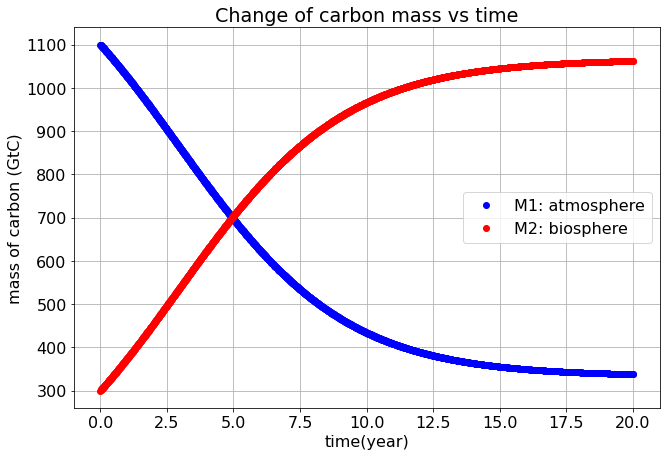

In [4]:
plt.figure(figsize=(10.5,7))
plt.rcParams.update({'font.size': 16})

# Plot of mass of carbon in atmosphere over the time
plt.plot(t,M1,'bo', label='M1: atmosphere')
plt.xlabel('time')
plt.ylabel('mass of carbon (GtC)')

# Plot of mass of carbon in biosphere over the time
plt.plot(t,M2,'ro', label='M2: biosphere')
plt.xlabel('time(year)')
plt.ylabel('mass of carbon (GtC)')

plt.title('Change of carbon mass vs time')
plt.legend()
plt.grid()
plt.show()

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)

In [5]:
tf = 100
dt = 1/365 

t = np.arange(ti,tf+dt,dt) # array that contains the times form the begining to the end

Nt = t.size                # number of the time steps

# call of the function boxCarbonModel to compute the carbon mass in 
M1, M2 = boxCarbonModel(Nt,M1i,M2i,k12,k21,dt)

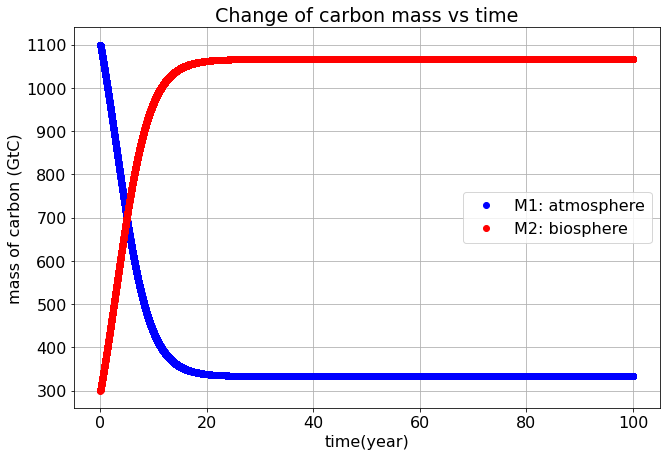

In [6]:
plt.figure(figsize=(10.5,7))
plt.rcParams.update({'font.size': 16})

# Plot of mass of carbon in atmosphere over the time
plt.plot(t,M1,'bo', label='M1: atmosphere')
plt.xlabel('time')
plt.ylabel('mass of carbon (GtC)')

# Plot of mass of carbon in biosphere over the time
plt.plot(t,M2,'ro', label='M2: biosphere')
plt.xlabel('time(year)')
plt.ylabel('mass of carbon (GtC)')

plt.title('Change of carbon mass vs time')
plt.legend()
plt.grid()
plt.show()

The carbon mass in biosphere increases over the years while it decreases in atmosphere. This can be explain by the excessive fossil fuels exploitation, land use.

3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

In [7]:
# The value of M1 and M2 at the end of the simulation
print('M1 = ',M1[-1],'GtC\n')
print('M2 = ',M2[-1],'GtC')

M1 =  333.3333333333658 GtC

M2 =  1066.6666666665792 GtC


__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.

In [8]:
# Load the anthropogenic emissions data 
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

# Extract the two columns from the historical dataset.
year = data[:,0]
cflux = data[:,1]

2. Plot the anthropogenic emissions data  

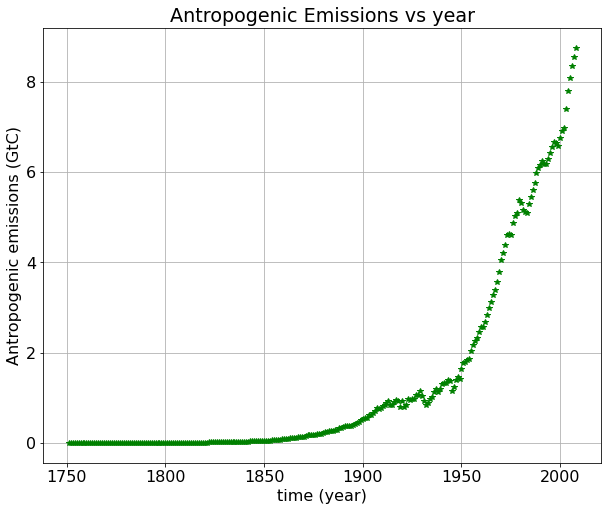

In [9]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})

plt.plot(year,cflux,'g*')      # plot the anthropogenic emissions data against the years

plt.ylabel('Antropogenic emissions (GtC)')  # label of y-axis
plt.xlabel('time (year)')                  # label of x-axis
plt.title('Antropogenic Emissions vs year')# title 
plt.grid()
plt.show()

The above plot shows the evolution of anthropogenic emissions over the years. The anthropogenic emissions are almost constant between 1750-1850, but they have started growing over the years. It seems reasonable because, before 1850, the industrial revolution was not that important, and the CO2 emission was not that alarming compare to these last decades.

3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

In [10]:
def boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,source):
    
    #time loop
    
    M1 = np.zeros((Nt,))        # Create an array of zeros of carbon mass in atmo. that has length Nt
    M2 = np.zeros((Nt,))        # Create an array of zeros of carbon mass in land that has length Nt

    # The foor loop below loops through the number of time steps.

    for i in np.arange(Nt):                      
        if (i==0):            
            # If at the first time step.
            M1[i] = M1i   # Initial mass of carbon in atmosphere
            M2[i] = M2i   # Initial mass of carbon in biosphere
        else:
            # If at a subsequent time step
            # Compute the change of carbon mass in atmosphere and land w.r.t

            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] + source[i]
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
            # Compute the new mass using the previous and the change of mass
            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
            
    return M1,M2

In [11]:
cflux = np.interp(t, year, cflux) #interpolate year and cflux values

# call of the function boxCarbonModel to compute the carbon mass in atmosphere and biosphere
M1,M2 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux)

 Mass of C in the atmosphere versus time

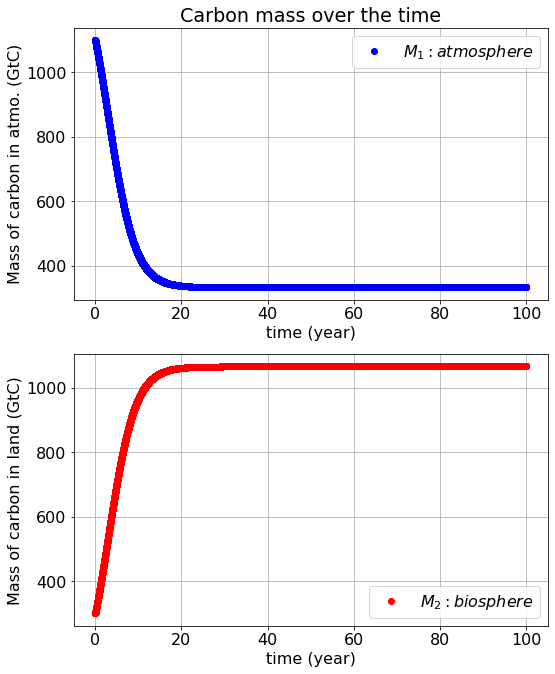

In [12]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

# Plot mass of carbon in the atmosphere versus time
plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='$M_{1}: atmosphere$')
plt.ylabel('Mass of carbon in atmo. (GtC)')      # y-axis
plt.xlabel('time (year)')                        # x-axis
plt.title('Carbon mass over the time')
plt.legend()
plt.grid()

# Plot mass of carbon in the land versus time
plt.subplot(2,1,2)
plt.plot(t,M2,'ro', label='$M_{2}: biosphere$')
plt.ylabel('Mass of carbon in land (GtC)')       # y-axis
plt.xlabel('time (year)')                        # x-axis
plt.legend()
plt.grid()
plt.show()

Adding the source term to the differential equation describing the change in the mass of carbon in the atmosphere shows that there is not much impact on the mass of carbon in the system compared to the absence of anthropogenic emissions.

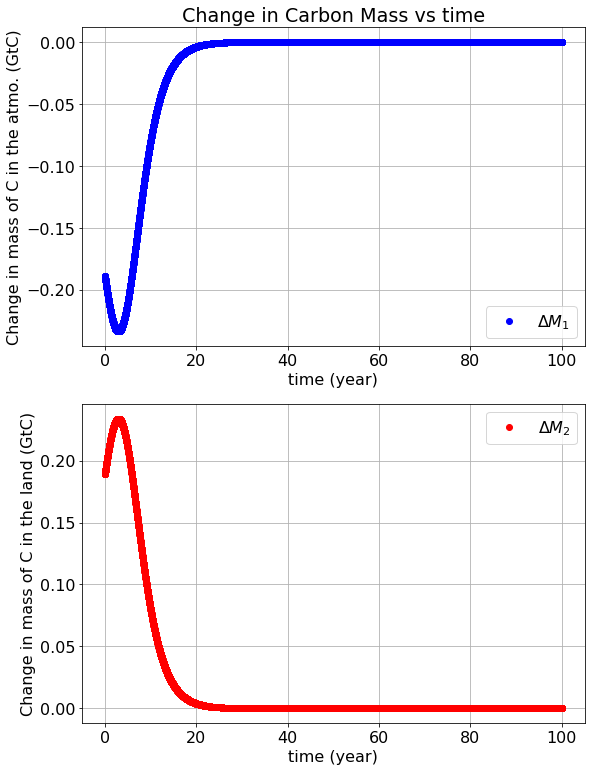

In [13]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

# Plot change in mass of carbon in the atmosphere vs time
plt.subplot(2,1,1)
plt.plot(t[1:],np.diff(M1),'bo', label='$\Delta M_{1}$')
plt.ylabel('Change in mass of C in the atmo. (GtC)')    # y-axis
plt.xlabel('time (year)')                               # x-axis
plt.title('Change in Carbon Mass vs time')
plt.legend()
plt.grid()

# Plot change in mass of carbon in the biosphere vs time
plt.subplot(2,1,2)
plt.plot(t[1:],np.diff(M2),'ro', label='$\Delta M_{2}$')
plt.ylabel('Change in mass of C in the land (GtC)')     # y-axis
plt.xlabel('time (year)')                               # x-axis
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

The change in carbon mass in both, atmosphere and land are opposite. This implies that the change in carbon mass in the land and in the atmosphere are well balanced.

    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

In [14]:
# The value of M1 and M2 at the end of the simulation
print('M1 = ',M1[-1],'GtC\n')
print('M2 = ',M2[-1],'GtC')

M1 =  333.3427058620549 GtC

M2 =  1066.957294137884 GtC


__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).

In [15]:
# Load the alternative emission data
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)

year = data[:,0]                 # Years
cflux_nze2030 = data[:,1]        # Net zero emissions by the year 2030
cflux_nze2050 = data[:,2]        # Net zero emissions by the year 2030
cflux_zeg = data[:,3]            # Zero emissions growth starting in 2008 

2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

In [16]:
# Interpolate year and cflux values to run the model for each scenario
cflux1 = np.interp(t, year, cflux_nze2030) 
cflux2 = np.interp(t, year, cflux_nze2050)
cflux3 = np.interp(t, year, cflux_zeg)

# call of the function boxCarbonModel to compute the carbon mass in atmosphere and biosphere
M1_1, M2_1 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux1)
M1_2, M2_2 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux2)
M1_3, M2_3 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux3)

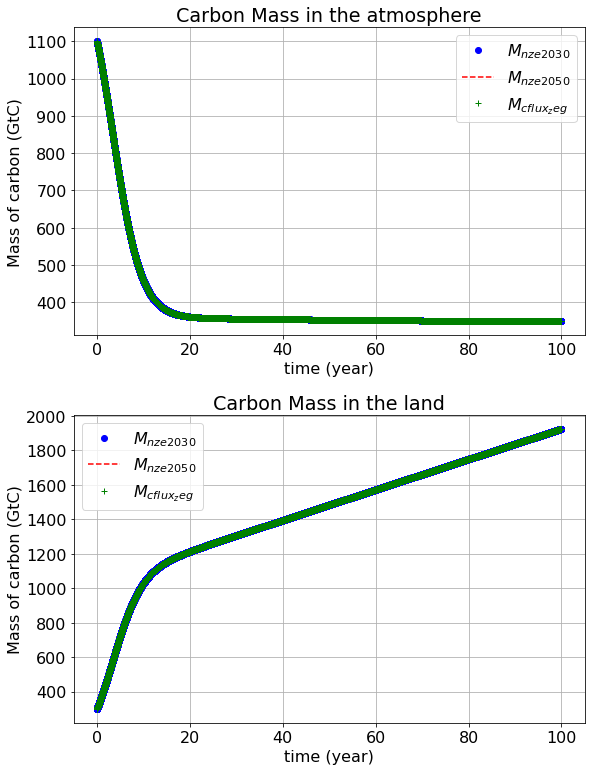

In [17]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

# Plot mass of carbon in atmosphere vs time for each scenario
plt.subplot(2,1,1)
plt.plot(t,M1_1,'bo', label='$M_{nze2030}$')    # Plot corresponding to the net zero emissions by the year 2030  
plt.plot(t,M1_2,'r--', label='$M_{nze2050}$')   # Plot corresponding to the net zero emissions by the year 2050
plt.plot(t,M1_3,'g+', label='$M_{cflux_zeg}$')  # Plot cooresponding to zero emissions growth
plt.ylabel('Mass of carbon (GtC)')              # y-label
plt.xlabel('time (year)')                       # x-label
plt.title('Carbon Mass in the atmosphere')      # title
plt.legend()
plt.grid()

# Plot mass of carbon in land vs time for each scenario
plt.subplot(2,1,2)
plt.plot(t,M2_1,'bo', label='$M_{nze2030}$')   # Plot corresponding to the net zero emissions by the year 2030  
plt.plot(t,M2_2,'r--', label='$M_{nze2050}$')  # Plot corresponding to the net zero emissions by the year 2050
plt.plot(t,M2_3,'g+', label='$M_{cflux_zeg}$') # Plot cooresponding to zero emissions growth
plt.ylabel('Mass of carbon (GtC)')             # y-label
plt.xlabel('time (year)')                      # x-label
plt.title('Carbon Mass in the land')           # title
plt.legend()
plt.grid()
plt.tight_layout()

The mitigation has an impact on the carbon mass in the land because it increased as the time increases (from 300 to about 1900). The masses of carbon in atmosphere are alomst the same as in the previous results.

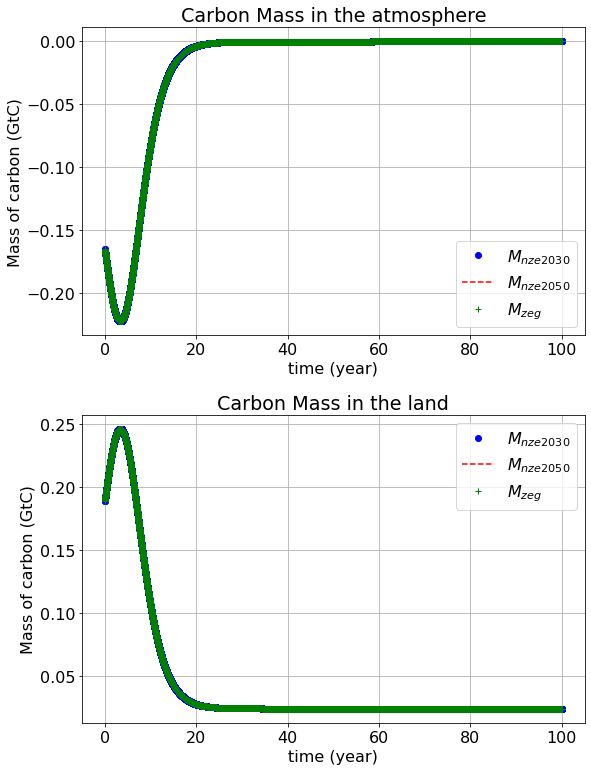

In [18]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

# Plot change of carbon in atmosphere vs time
plt.subplot(2,1,1)
plt.plot(t[1:],np.diff(M1_1),'bo', label='$M_{nze2030}$') # Plot corresponding to the net zero emissions by the year 2030  
plt.plot(t[1:],np.diff(M1_2),'r--', label='$M_{nze2050}$')# Plot corresponding to the net zero emissions by the year 2050  
plt.plot(t[1:],np.diff(M1_3),'g+', label='$M_{zeg}$')     # Plot cooresponding to zero emissions growth
plt.ylabel('Mass of carbon (GtC)')                                # y-label
plt.xlabel('time (year)')                                         # x-label
plt.title('Carbon Mass in the atmosphere')                        # title of the graph
plt.legend()
plt.grid()

# Plot change of carbon in land vs time
plt.subplot(2,1,2)
plt.plot(t[1:],np.diff(M2_1),'bo', label='$M_{nze2030}$')         # Plot corresponding to the net zero emissions by the year 2030  
plt.plot(t[1:],np.diff(M2_2),'r--', label='$M_{nze2050}$')        # Plot corresponding to the net zero emissions by the year 2050  
plt.plot(t[1:],np.diff(M2_3),'g+', label='$M_{zeg}$')             # Plot cooresponding to zero emissions growth
plt.ylabel('Mass of carbon (GtC)')                                # y-label
plt.xlabel('time (year)')                                         # x-label
plt.title('Carbon Mass in the land')
plt.legend()
plt.grid()
plt.tight_layout()

The change in carbon mass in the atmosphere and land is not opposite. This implies that the change in land and atmospheric carbon mass is not balanced due to mitigation effects.